# Assignment 2 (5 Marks)


## Question 1

Please use the same data set as in Assignment 1 for the following plot. 

Visualize the time series: Regular Unleaded Gasoline price in "London" from 2000 to 2022. Smooth the time series using simple moving average with windowsize=5.

/var/folders/rv/ytfx52d11xb98pwmw7g2yshr0000gn/T/ipykernel_7792/2492797502.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan["SMA"] = datan["London"].rolling(window=5).mean()


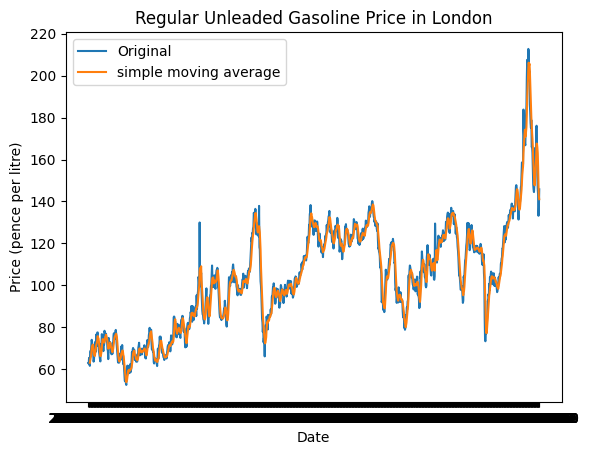

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


df = pd.read_csv('data/fueltypesall1991-2023.csv')
#df

#data = df[(df['Fuel Type'] == 'Regular Unleaded Gasoline') & df[['London']]]
data = df[(df['Fuel Type'] == 'Regular Unleaded Gasoline') &
          (df['Date'] > '2000-01-01') & (df[ 'Date'] < '2022-12-30')]
datan = data[['London']]

# Smooth the time series using a simple moving average with windowsize=5
datan["SMA"] = datan["London"].rolling(window=5).mean()

# Plot the original time series and the smoothed time series
plt.plot(data["Date"], datan["London"], label="Original")
plt.plot(data["Date"], datan["SMA"], label="simple moving average")
plt.xlabel("Date")
plt.ylabel("Price (pence per litre)")
plt.title("Regular Unleaded Gasoline Price in London")
plt.legend()
plt.show()

## Question 2

The following data set includes the volcanos in the world. 
https://github.com/plotly/datasets/blob/master/volcano_db.csv

Please plot a map with three countries: Canada, US and Mexico. Show the exact locations (latitude and longitude) of the volcanos on this map.


In [7]:
import pandas as pd
import geopandas

volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [8]:

countries = volcano[(volcano['Country'] == 'Canada') | (volcano['Country'] == 'United States') | (volcano['Country'] == 'Mexico')]



<AxesSubplot: >

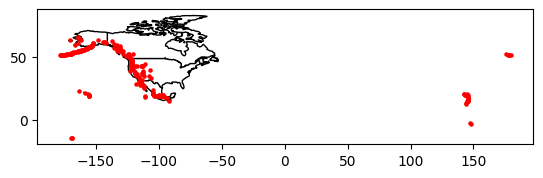

In [9]:
geo_countries = geopandas.GeoDataFrame(
    countries, geometry=geopandas.points_from_xy(countries.Longitude, countries.Latitude))

north_america = world[world.name.isin(['Canada', 'United States of America', 'Mexico'])]
north_america_map = north_america.plot(color='white', edgecolor='black')
geo_countries.plot(ax=north_america_map, color='red', markersize=5)